In [68]:
#define functions for string process
def isValid(stringOfSequence):
    for i in range(len(stringOfSequence)):
        if i % 4 == 1 and stringOfSequence[i] not in ["A", "T", "G", "C", "U"]:
            return False
        if i % 4 == 2 and stringOfSequence[i] not in ["r", "d", "m"]:
            return False
        if i % 4 == 3 and stringOfSequence[i] not in ["o", "s"]:
            return False
    return True

def lengthOfSequence(stringOfSequence):
    if not isValid(stringOfSequence):
        return -1
    return len(stringOfSequence) // 4 + 1 

def getProductTypes(stringOfSequence):
    if not isValid(stringOfSequence):
        return -1
    myset = set()
    for i in range(2, len(stringOfSequence), 4):
        myset.add(stringOfSequence[i])
        if stringOfSequence[i] == 'm':
            if i + 1 < len(stringOfSequence) and stringOfSequence[i + 1] != 's':
                return -1
    if len(myset) == 1 and list(myset)[0] == 'r':
        return "vanilla RNA"
    if len(myset) == 2:
        if 'd' in myset and 'r' in myset:
            return "chimera"
        if 'm' in myset and 'r' in myset:
            return "mod RNA"
    return -1


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

In [70]:
data = pd.read_csv("synthesis_data.csv")

In [71]:
data.head()

four_letter_sequence  synthesis_id       n-1  \
0  -Gms-Ums-Cms-Gro-Cro-Uro-Cro-Cro-Cro-Cro-Gro-G...             1  4.797640   
1  -Ums-Cms-Ams-Gro-Gro-Cro-Cro-Gro-Cro-Aro-Gro-G...             1  8.056743   
2  -Gms-Ums-Ams-Uro-Aro-Uro-Aro-Gro-Aro-Uro-Gro-A...             1  5.376105   
3  -Cms-Ums-Cms-Cro-Cro-Uro-Cro-Cro-Cro-Aro-Gro-G...             1  1.932084   
4  -Cms-Ums-Cms-Cro-Cro-Uro-Cro-Cro-Cro-Aro-Gro-G...             1  7.064074   

         n+1  pure_yield  full_length_product  other_impurity  \
0   6.381929    8.795529            74.553685        0.021143   
1   8.434807    6.089592            74.963525        0.053352   
2  10.042194    9.068502            73.169193        0.000000   
3  10.383295    4.258049            73.053785        0.000000   
4   4.899295    9.150096            77.128862        0.000000   

   synthesis_duration  postprocessing_duration  
0           55.654369                35.755761  
1           55.654369                35.755761  
2           55.654369                35.755761  
3           55.654369                35.755761  
4           55.654369                35.755761

In [72]:
print("the shape of data:{}".format(data.shape))
print(data.isnull().sum())

the shape of data:(160, 9)
four_letter_sequence        0
synthesis_id                0
n-1                        34
n+1                        34
pure_yield                 16
full_length_product        32
other_impurity             32
synthesis_duration          0
postprocessing_duration     0
dtype: int64


In [73]:
#a. Use the functions from part 1 to create new columns for product type and length (if you were unable to
#complete some parts of problem 1, just do what you can.)
data["product_type"] = data["four_letter_sequence"].apply(getProductTypes)
data["length"] = data["four_letter_sequence"].apply(lengthOfSequence)

In [74]:
data["product_type"].value_counts()

mod RNA        64
chimera        48
vanilla RNA    48
Name: product_type, dtype: int64

In [75]:
data["length"].value_counts()

100    112
36      48
Name: length, dtype: int64

In [76]:
#b. What seems to be affecting the pure yield? What other variables seem to be related to the pure yield (e.g.,
#full length product, etc.)? Show any plots or descriptive statistics you use to explore this data and what
#strategies were needed to clean the data.

In [77]:
data.columns

Index(['four_letter_sequence', 'synthesis_id', 'n-1', 'n+1', 'pure_yield',
       'full_length_product', 'other_impurity', 'synthesis_duration',
       'postprocessing_duration', 'product_type', 'length'],
      dtype='object')

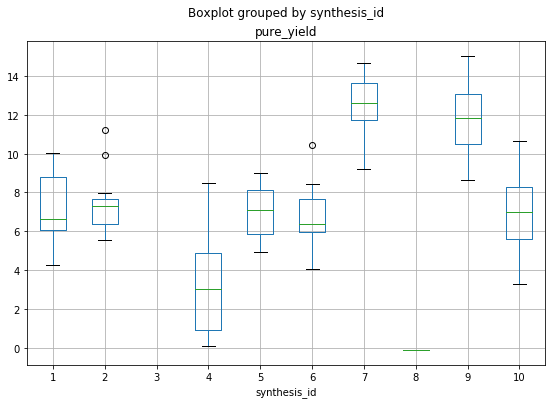

In [78]:
#synthesis_id on pure_yield
data.boxplot("pure_yield", by="synthesis_id", figsize=(9, 6))

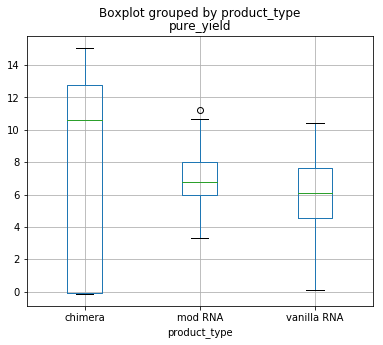

In [79]:
#product_type vs pure_yield
data.boxplot("pure_yield", by="product_type", figsize=(6, 5))

In [80]:
chimera = data[data["product_type"] == "chimera"]["pure_yield"].dropna()
mod = data[data["product_type"] == "mod RNA"]["pure_yield"].dropna()
vanilla = data[data["product_type"] == "vanilla RNA"]["pure_yield"].dropna()
t, p = ttest_ind(chimera, mod)
print("p-value between chimera and mod RNA:     {}".format(ttest_ind(chimera, mod)[1]))
print("p-value between chimera and vanilla RNA: {}".format(ttest_ind(chimera, vanilla)[1]))
print("p-value between mod and vanilla RNA:     {}".format(ttest_ind(mod, vanilla)[1]))

p-value between chimera and mod RNA:     0.31343459371374505
p-value between chimera and vanilla RNA: 0.01350432733221776
p-value between mod and vanilla RNA:     0.0016082556522800016


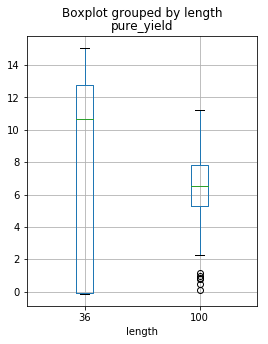

In [81]:
#length vs pure_yield
data.boxplot("pure_yield", by="length", figsize=(4, 5))

In [82]:
l_36 = data[data["length"] == 36]["pure_yield"].dropna()
l_100 = data[data["length"] == 100]["pure_yield"].dropna()
print("p-value:  {}".format(ttest_ind(l_36, l_100)[1]))

p-value:  0.019513975923238207


In [83]:
#visulize the correlations between other numerical values

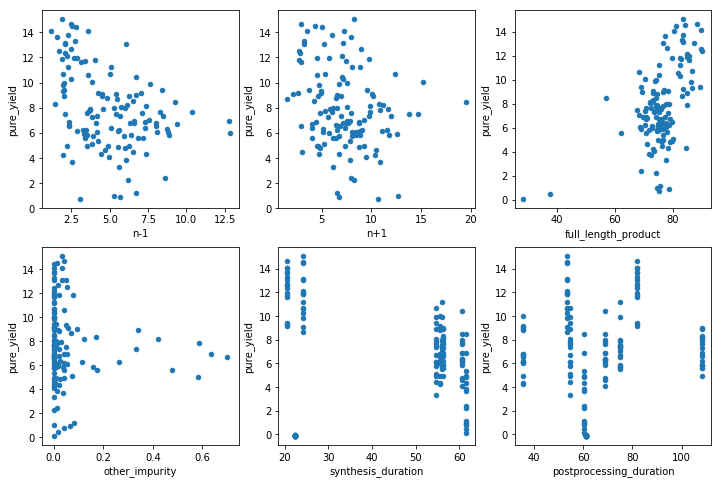

In [84]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
data.plot(x="n-1", y="pure_yield", kind="scatter", ax=axes[0, 0])
data.plot(x="n+1", y="pure_yield", kind="scatter", ax=axes[0, 1])
data.plot(x="full_length_product", y="pure_yield", kind="scatter", ax=axes[0, 2])
data.plot(x="other_impurity", y="pure_yield", kind="scatter", ax=axes[1, 0])
data.plot(x="synthesis_duration", y="pure_yield", kind="scatter", ax=axes[1, 1])
data.plot(x="postprocessing_duration", y="pure_yield", kind="scatter", ax=axes[1, 2])

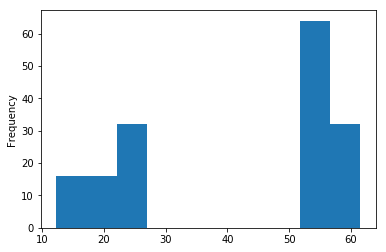

In [85]:
#distribution of synthesis_duration time
data["synthesis_duration"].plot.hist()

In [86]:
synthesis_short = data[data["synthesis_duration"] < 40]["pure_yield"].dropna()
synthesis_long = data[data["synthesis_duration"] > 40]["pure_yield"].dropna()
print("p-value:  {}".format(ttest_ind(synthesis_short, synthesis_long)[1]))

p-value:  0.019513975923238207


In [87]:
# Take home messages:
# synthesis_id is important for pure_yield, some ids have higher pure yield
# product_types are also correlated with pure_yield
# length is also correlated with pure_yield
# synthesis_duration is also important for pure_yield, short duration time leads to high pure yield.

In [88]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators import H2ORandomForestEstimator

In [89]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------------
H2O cluster uptime:         1 hour 13 mins
H2O cluster timezone:       America/New_York
H2O data parsing timezone:  UTC
H2O cluster version:        3.18.0.2
H2O cluster version age:    8 months and 16 days !!!
H2O cluster name:           H2O_from_python_sheldon_ic4cn8
H2O cluster total nodes:    1
H2O cluster free memory:    3.334 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.6.6 final
--------------------------  ----------------------------------------

In [90]:
data.columns

Index(['four_letter_sequence', 'synthesis_id', 'n-1', 'n+1', 'pure_yield',
       'full_length_product', 'other_impurity', 'synthesis_duration',
       'postprocessing_duration', 'product_type', 'length'],
      dtype='object')

In [113]:
h2o_data = H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [114]:
h2o_data["synthesis_id"] = h2o_data["synthesis_id"].asfactor()
#h2o_data["synthesis_duration"] = (h2o_data["synthesis_duration"] < 40).asfactor()
#h2o_data["length"] = (h2o_data["length"] == 36).asfactor()

In [115]:
h2o_data.summary()

four_letter_sequence synthesis_id n-1 n+1 pure_yield full_length_product other_impurity synthesis_duration postprocessing_duration product_type length 
 
 
 type enum enum real real real real real real real enum int 
 mins 1.1656927380849775 1.5110867042344756 -0.11742580164803045 28.57795306407977 0.0 12.239413 0.0131435 36.0 
 mean 4.870790326398085 7.275583693427041 6.9115012299942915 76.12434446323078 0.05298092176279329 42.41193445666353 59.891161126015845 80.80000000000001 
 maxs 12.825024838253494 19.54017285264413 15.046220954862296 90.26048345517592 0.6992047443893575 61.546239446073656 108.42159720976424 100.0 
 sigma 2.396764845736352 3.0013166242824543 3.9765758567692693 7.897568395670132 0.1288376102226953 18.847793003782325 27.247650344080927 29.42056782797971 
 zeros 0 0 0 0 60 0 0 0 
 missing 0 0 34 34 16 32 32 0 0 0 0 
 0 -Gms-Ums-Cms-Gro-Cro-Uro-Cro-Cro-Cro-Cro-Gro-Gro-Cro-Aro-Uro-Cro-Gro-Gro-Cro-Uro-Gro-Uro-Uro-Uro-Uro-Aro-Gro-Aro-Gro-Cro-Uro-Aro-Gro-Aro-Aro-Aro-Uro-Aro-Gro-Cro-Aro-Aro-Gro-Uro-Uro-Aro-Aro-Aro-Aro-Uro-Aro-Aro-Gro-Gro-Cro-Uro-Aro-Gro-Uro-Cro-Cro-Gro-Uro-Uro-Aro-Uro-Cro-Aro-Aro-Cro-Uro-Uro-Gro-Aro-Aro-Aro-Aro-Aro-Gro-Uro-Gro-Gro-Cro-Aro-Cro-Cro-Gro-Aro-Gro-Uro-Cro-Gro-Gro-Uro-Gro-Cro-Uro-Ums-Ums-Um 1 4.797640248115722 6.38192879999897 8.795529263072389 74.55368478865601 0.021143241089251277 55.65436943859153 35.75576136234773 mod RNA 100.0 
 1 -Ums-Cms-Ams-Gro-Gro-Cro-Cro-Gro-Cro-Aro-Gro-Gro-Aro-Aro-Gro-Aro-Gro-Gro-Aro-Aro-Gro-Uro-Uro-Uro-Uro-Aro-Gro-Aro-Gro-Cro-Uro-Aro-Gro-Aro-Aro-Aro-Uro-Aro-Gro-Cro-Aro-Aro-Gro-Uro-Uro-Aro-Aro-Aro-Aro-Uro-Aro-Aro-Gro-Gro-Cro-Uro-Aro-Gro-Uro-Cro-Cro-Gro-Uro-Uro-Aro-Uro-Cro-Aro-Aro-Cro-Uro-Uro-Gro-Aro-Aro-Aro-Aro-Aro-Gro-Uro-Gro-Gro-Cro-Aro-Cro-Cro-Gro-Aro-Gro-Uro-Cro-Gro-Gro-Uro-Gro-Cro-Uro-Ums-Ums-Um 1 8.056742643533934 8.434806962390747 6.089591814019787 74.96352511216574 0.053351872084340515 55.65436943859153 35.75576136234773 mod RNA 100.0 
 2 -Gms-Ums-Ams-Uro-Aro-Uro-Aro-Gro-Aro-Uro-Gro-Aro-Aro-Gro-Gro-Uro-Cro-Aro-Cro-Uro-Gro-Uro-Uro-Uro-Uro-Aro-Gro-Aro-Gro-Cro-Uro-Aro-Gro-Aro-Aro-Aro-Uro-Aro-Gro-Cro-Aro-Aro-Gro-Uro-Uro-Aro-Aro-Aro-Aro-Uro-Aro-Aro-Gro-Gro-Cro-Uro-Aro-Gro-Uro-Cro-Cro-Gro-Uro-Uro-Aro-Uro-Cro-Aro-Aro-Cro-Uro-Uro-Gro-Aro-Aro-Aro-Aro-Aro-Gro-Uro-Gro-Gro-Cro-Aro-Cro-Cro-Gro-Aro-Gro-Uro-Cro-Gro-Gro-Uro-Gro-Cro-Uro-Ums-Ums-Um 1 5.376105268294187 10.04219383680772 9.068502490996169 73.16919310915749 0.0 55.65436943859153 35.75576136234773 mod RNA 100.0 
 3 -Cms-Ums-Cms-Cro-Cro-Uro-Cro-Cro-Cro-Aro-Gro-Gro-Aro-Uro-Cro-Cro-Uro-Cro-Uro-Cro-Gro-Uro-Uro-Uro-Uro-Aro-Gro-Aro-Gro-Cro-Uro-Aro-Gro-Aro-Aro-Aro-Uro-Aro-Gro-Cro-Aro-Aro-Gro-Uro-Uro-Aro-Aro-Aro-Aro-Uro-Aro-Aro-Gro-Gro-Cro-Uro-Aro-Gro-Uro-Cro-Cro-Gro-Uro-Uro-Aro-Uro-Cro-Aro-Aro-Cro-Uro-Uro-Gro-Aro-Aro-Aro-Aro-Aro-Gro-Uro-Gro-Gro-Cro-Aro-Cro-Cro-Gro-Aro-Gro-Uro-Cro-Gro-Gro-Uro-Gro-Cro-Uro-Ums-Ums-Um 1 1.932083653985164 10.383295080786532 4.258048929602101 73.05378521882169 0.0 55.65436943859153 35.75576136234773 mod RNA 100.0 
 4 -Cms-Ums-Cms-Cro-Cro-Uro-Cro-Cro-Cro-Aro-Gro-Gro-Aro-Uro-Cro-Cro-Uro-Cro-Uro-Cro-Gro-Uro-Uro-Uro-Uro-Aro-Gro-Aro-Gro-Cro-Uro-Aro-Gro-Aro-Aro-Aro-Uro-Aro-Gro-Cro-Aro-Aro-Gro-Uro-Uro-Aro-Aro-Aro-Aro-Uro-Aro-Aro-Gro-Gro-Cro-Uro-Aro-Gro-Uro-Cro-Cro-Gro-Uro-Uro-Aro-Uro-Cro-Aro-Aro-Cro-Uro-Uro-Gro-Aro-Aro-Aro-Aro-Aro-Gro-Uro-Gro-Gro-Cro-Aro-Cro-Cro-Gro-Aro-Gro-Uro-Cro-Gro-Gro-Uro-Gro-Cro-Uro-Ums-Ums-Um 1 7.064074170308597 4.8992952275720505 9.150096404816358 77.12886228572188 0.0 55.65436943859153 35.75576136234773 mod RNA 100.0 
 5 -Cms-Cms-Ums-Cro-Uro-Uro-Gro-Uro-Uro-Gro-Cro-Uro-Gro-Cro-Uro-Gro-Cro-Cro-Cro-Gro-Gro-Uro-Uro-Uro-Uro-Aro-Gro-Aro-Gro-Cro-Uro-Aro-Gro-Aro-Aro-Aro-Uro-Aro-Gro-Cro-Aro-Aro-Gro-Uro-Uro-Aro-Aro-Aro-Aro-Uro-Aro-Aro-Gro-Gro-Cro-Uro-Aro-Gro-Uro-Cro-Cro-Gro-Uro-Uro-Aro-Uro-Cro-Aro-Aro-Cro-Uro-Uro-Gro-Aro-Aro-Aro-Aro-Aro-Gro-Uro-Gro-Gro-Cro-Aro-Cro-Cro-Gro-Aro-Gro-Uro-Cro-Gro-Gro-Uro-Gro-Cro-Uro-Ums-Ums-Um 1 8.796217339535243 8.011002609995531 6.04056157947054

In [116]:
training_columns = h2o_data.columns
training_columns.remove("four_letter_sequence")
training_columns.remove("pure_yield")
response_column = "pure_yield"

In [117]:
# Define model
model = H2ORandomForestEstimator(ntrees=100, max_depth=20, nfolds=3)

# Train model
model.train(x=training_columns, y=response_column, training_frame=h2o_data)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [118]:
performance = model.model_performance(test_data=h2o_data)
print (performance)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.5245040433288122
RMSE: 0.7242265138261732
MAE: 0.5575848550996229
RMSLE: 0.12224338473079
Mean Residual Deviance: 0.5245040433288122



              variable  relative_importance  scaled_importance  percentage
0         synthesis_id         79115.367188           1.000000    0.318941
1  full_length_product         50720.867188           0.641100    0.204473
2                  n+1         37725.937500           0.476847    0.152086
3                  n-1         27707.328125           0.350214    0.111698
4   synthesis_duration         14808.926758           0.187181    0.059700


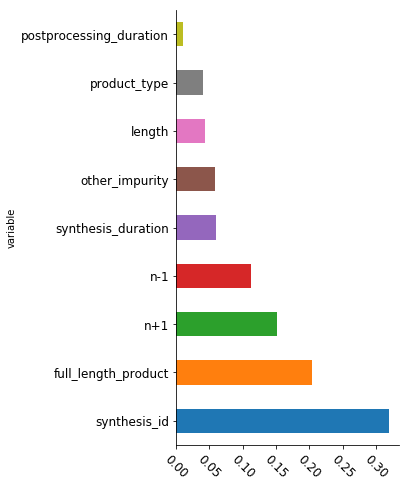

In [119]:
#get feature importance from model
feature_importance = model.varimp(use_pandas=True)
print(feature_importance.head())

feature_importance.plot.barh(x="variable", y="percentage", figsize=(4, 8), legend=False)
sns.despine()
plt.xticks(size=12, rotation=-45)
plt.yticks(size=12);